In [1]:
import pandas as pd
logs_df = pd.read_csv("../runs/Mar21_20-20-04_apollo.fi.muni.cz/callbacks.tsv", sep="\t",
                     names=["step", "epoch", "metric", "value"])

In [2]:
logs_df = logs_df[logs_df.step <= 400]  # interesting part

# temporary fix: scaling of OC
logs_df.loc[logs_df.metric == 'id_val_OC_ratio', 'value'] = \
logs_df.loc[logs_df.metric == 'id_val_OC_ratio', 'value'] / \
logs_df.loc[logs_df.metric == 'id_val_OC_ratio', 'value'].max()

In [3]:
logs_df.metric.unique()

array(['id_val_PC_ratio', 'id_val_PC_std', 'id_val_DC_cos_diff',
       'id_val_DC_cos_std', 'id_val_DC_l2_diff', 'id_val_DC_l2_std',
       'id_val_OC_ratio', 'id_val_OC_max_logits_mean',
       'id_val_OC_max_logits_std', 'id_val_Accuracy', 'id_val_Loss',
       'ood_val_Accuracy', 'ood_val_Loss'], dtype=object)

In [4]:
metric_groups = ["Accuracy", "Loss", "PC", "DC", "OC"]

In [5]:
def plot_group(metric_group: str, ax=None):
    for metric in [m for m in logs_df.metric.unique() if metric_group in m]:
        metric_logs = logs_df[logs_df.metric == metric].set_index("step", drop=True)
        metric_logs[metric] = metric_logs["value"]
        ax = metric_logs[metric].plot(figsize=(15, 7), ax=ax, legend=True, grid=True)
    return ax

<AxesSubplot:xlabel='step'>

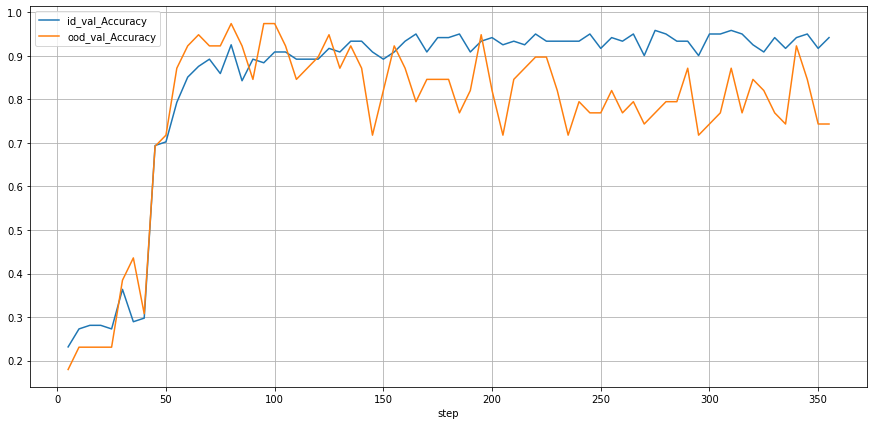

In [6]:
plot_group("Accuracy")

<AxesSubplot:xlabel='step'>

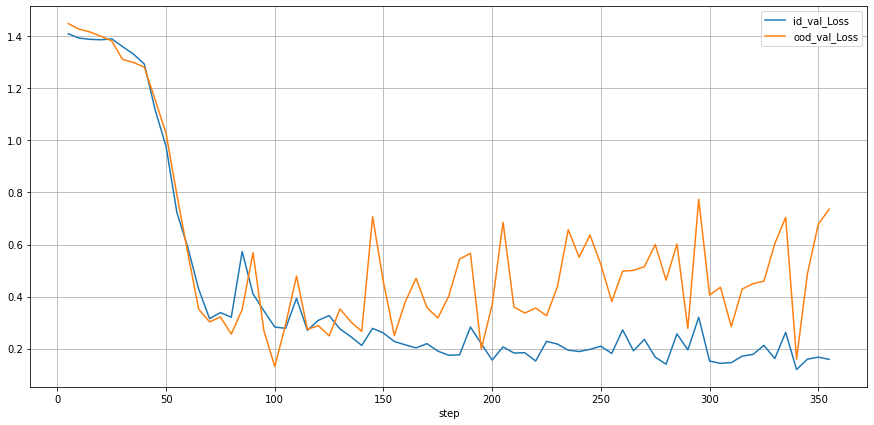

In [7]:
plot_group("Loss")

## Distributional coherence (DC)

Coherence of logits of the model on 

* **original**
* **augmented (cycle-translated)**.

Computed on in-distribution (id) validation samples, compared to out-of-distribution (ood) accuracy and loss.

<AxesSubplot:xlabel='step'>

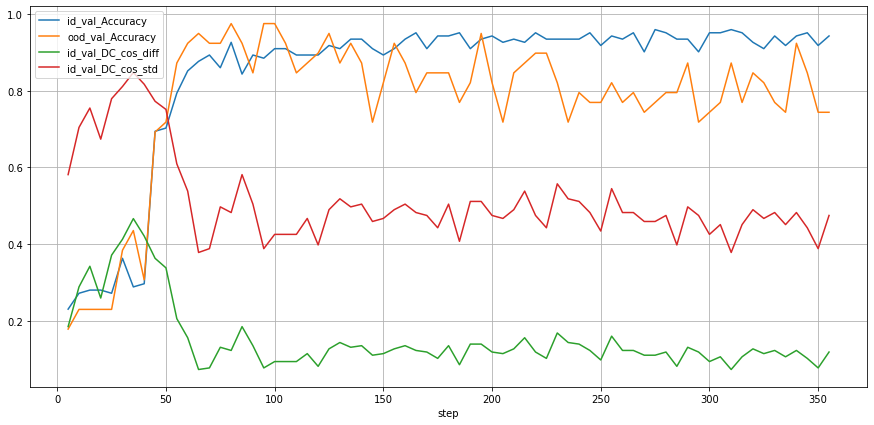

In [8]:
ax = plot_group("Accuracy")
plot_group("DC_cos", ax=ax)

<AxesSubplot:xlabel='step'>

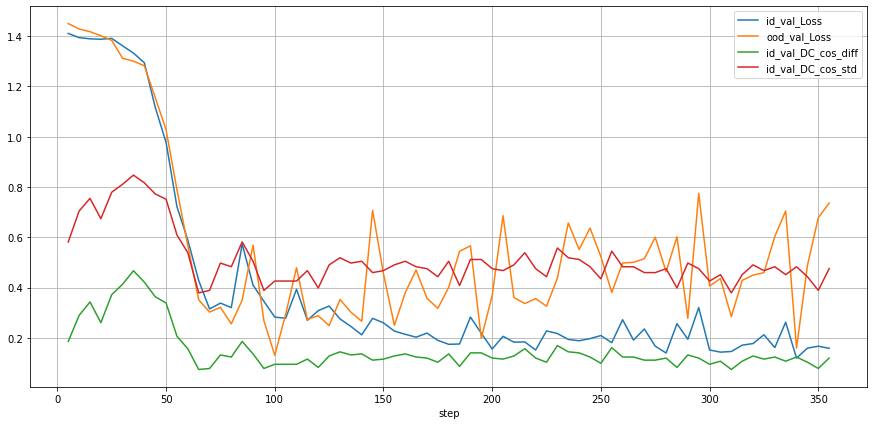

In [9]:
ax = plot_group("Loss")
plot_group("DC_cos", ax=ax)

## Prediction consistency (PC)

Consistency of the **predictions** (argmax of logits) among the $r$ minor **perturbations P**;

here: $P=\text{dropout}=0.2$, $r=10$).

Computed on in-distribution (id) validation samples, compared to out-of-distribution (ood) accuracy and loss.

<AxesSubplot:xlabel='step'>

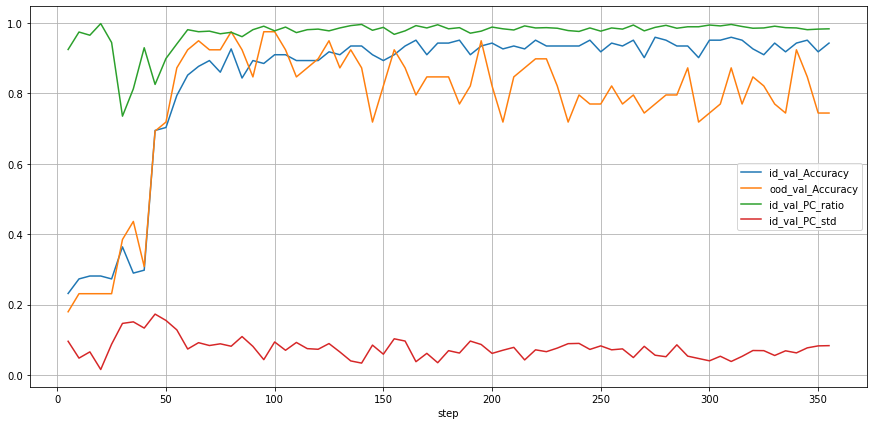

In [10]:
ax = plot_group("Accuracy")
plot_group("PC", ax=ax)

<AxesSubplot:xlabel='step'>

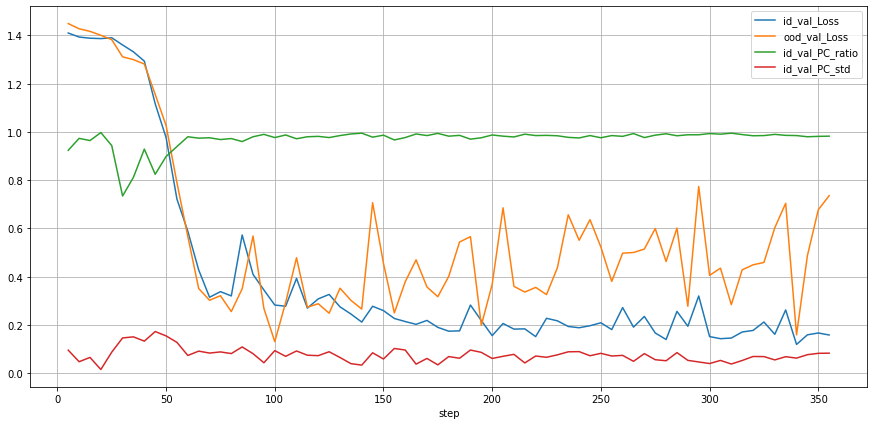

In [11]:
ax = plot_group("Loss")
plot_group("PC", ax=ax)

## Overconfidence (OC)

Relative sum of **logits** with max value exceeding given threshold $T$;

here: $T=0.8$.

Computed on in-distribution (id) validation samples, compared to out-of-distribution (ood) validation accuracy and loss.

<AxesSubplot:xlabel='step'>

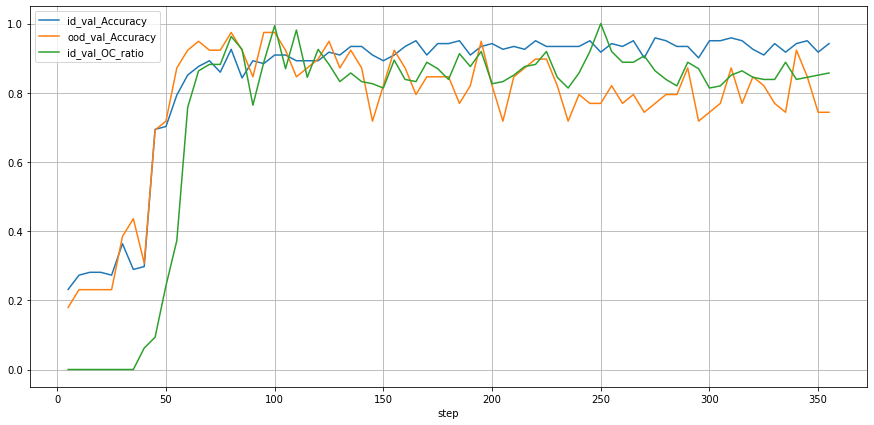

In [12]:
ax = plot_group("Accuracy")
plot_group("OC_ratio", ax=ax)

<AxesSubplot:xlabel='step'>

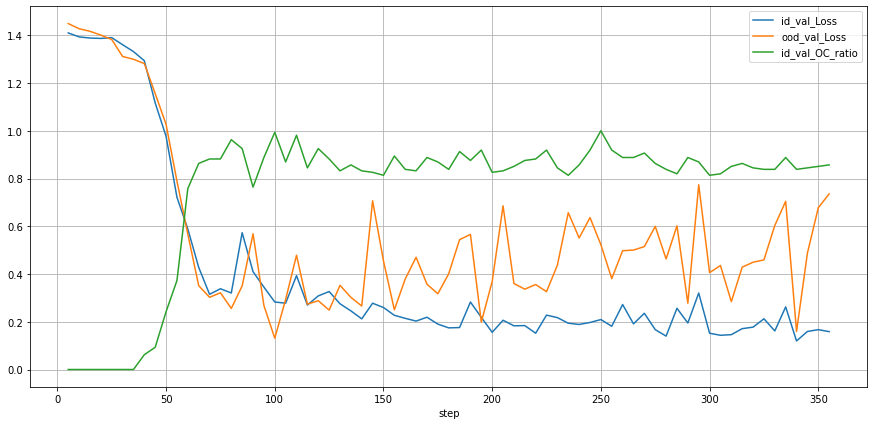

In [13]:
ax = plot_group("Loss")
plot_group("OC_ratio", ax=ax)

<AxesSubplot:xlabel='step'>

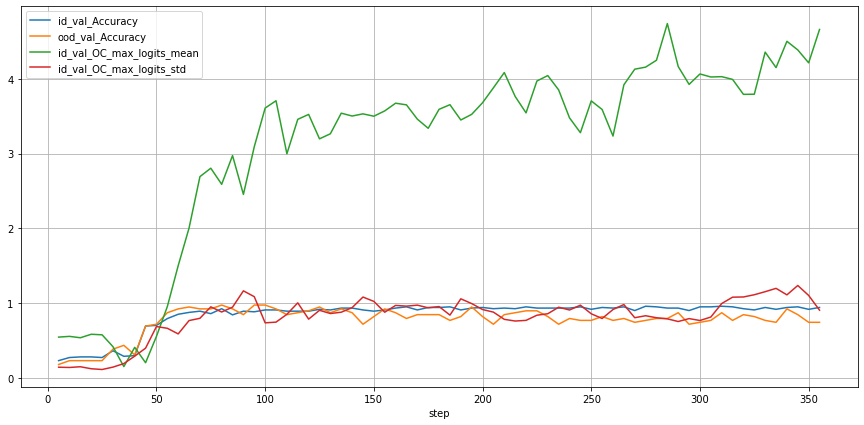

In [14]:
ax = plot_group("Accuracy")
plot_group("OC_max", ax=ax)

<AxesSubplot:xlabel='step'>

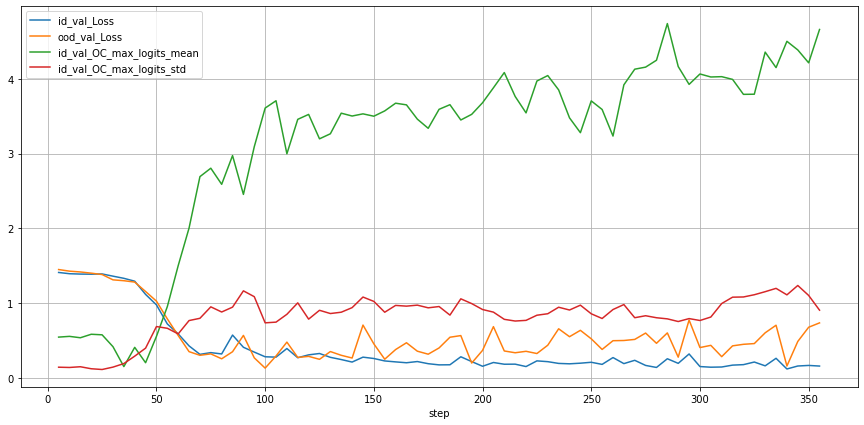

In [15]:
ax = plot_group("Loss")
plot_group("OC_max", ax=ax)